# (Ford GoBike System Data " baywheels-data ")
> With the last version which updated at 6 july 2020
## by (Mohamed Abdalla)

## Preliminary Wrangling
> first of all speaking about data set elements i choosed #Ford GoBike System Data " baywheels-data " which generated in 2020
> our data compet from 13 columns and each one explains one constsntly elemnt about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  
> and my mainly jop for this dataset is clean and preparing it for nice visualization

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [41]:
# load my dataset which is downloaded manually from udacity 
df = pd.read_csv('202006-baywheels-tripdata.csv')
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.76,-122.42,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.78,-122.46,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.79,-122.44,casual


In [42]:
# finding the structure of our dataset by using this simple command 
df.shape

(158168, 13)

In [43]:
# finding data types for each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


In [44]:
# to see if there a duplicated values or not
df.duplicated().sum()

0

In [45]:
# the started_at and ended_at columns classified as object so we have to convert them to date rime instead
df.rideable_type  = df.rideable_type.astype('category')
df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)

In [46]:
#counting each element of rideable_type columns 
df.rideable_type.value_counts()

electric_bike    109176
docked_bike       48992
Name: rideable_type, dtype: int64

In [47]:
#counting each element of member_casual columns 
df.member_casual.value_counts()

casual    95549
member    62619
Name: member_casual, dtype: int64

In [48]:
# this for showing count of null values per specific columns
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    58948
start_station_id      58948
end_station_name      61017
end_station_id        61017
start_lat                 0
start_lng                 0
end_lat                 276
end_lng                 276
member_casual             0
dtype: int64

In [49]:
# Remove rows that does not have member_casual value
df[df['member_casual'].isnull() == False]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.400000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.490000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.410950,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.410000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.429210,37.772894,-122.509079,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158163,0B71759604CAC23A,docked_bike,2020-06-03 17:36:00,2020-06-03 17:48:03,Sanchez St at 15th St,95.0,11th St at Natoma St,77.0,37.766218,-122.431059,37.773507,-122.416040,casual
158164,F9B05C6AF19DDFA6,docked_bike,2020-06-09 16:11:52,2020-06-09 16:22:46,MacArthur BART Station,176.0,Miles Ave at Cavour St,205.0,37.828409,-122.266314,37.838800,-122.258732,casual
158165,7CD57741868F792F,docked_bike,2020-06-20 21:23:17,2020-06-20 21:38:26,Bay Pl at Vernon St,195.0,Bay Pl at Vernon St,195.0,37.812314,-122.260778,37.812314,-122.260779,casual
158166,B63CC04A5F7D3245,docked_bike,2020-06-13 11:40:08,2020-06-13 11:55:17,Alcatraz Ave at Shattuck Ave,168.0,Rockridge BART Station,171.0,37.849594,-122.265568,37.844279,-122.251900,casual


In [50]:
# Remove rows that does not have start_station_id value
df[df['start_station_id'].isnull() == False]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.410950,37.790000,-122.440000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.429210,37.772894,-122.509079,casual
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,140.0,4th St at 16th St,104.0,37.747758,-122.425121,37.767008,-122.390851,casual
10,BE55928B0B2837A6,electric_bike,2020-06-03 14:50:30,2020-06-03 15:07:00,Yerba Buena Center for the Arts (Howard St at ...,284.0,NaN,NaN,37.784577,-122.400985,37.760000,-122.420000,casual
14,7E0C4C5917A9EEC2,electric_bike,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,8.0,Hyde St at Post St,369.0,37.799943,-122.398562,37.787527,-122.416830,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158163,0B71759604CAC23A,docked_bike,2020-06-03 17:36:00,2020-06-03 17:48:03,Sanchez St at 15th St,95.0,11th St at Natoma St,77.0,37.766218,-122.431059,37.773507,-122.416040,casual
158164,F9B05C6AF19DDFA6,docked_bike,2020-06-09 16:11:52,2020-06-09 16:22:46,MacArthur BART Station,176.0,Miles Ave at Cavour St,205.0,37.828409,-122.266314,37.838800,-122.258732,casual
158165,7CD57741868F792F,docked_bike,2020-06-20 21:23:17,2020-06-20 21:38:26,Bay Pl at Vernon St,195.0,Bay Pl at Vernon St,195.0,37.812314,-122.260778,37.812314,-122.260779,casual
158166,B63CC04A5F7D3245,docked_bike,2020-06-13 11:40:08,2020-06-13 11:55:17,Alcatraz Ave at Shattuck Ave,168.0,Rockridge BART Station,171.0,37.849594,-122.265568,37.844279,-122.251900,casual


In [51]:
# Extracting day of week, hours information from the started_at
df['start_time_day_of_week']= df['started_at'].dt.strftime('%a')
df['start_time_hour']= df['started_at'].dt.hour

In [52]:
# making counting by seperated day 
week_days = ['Sat', 'Sun','Mon','Tue','Wed','Thu','Fri']
weekday_order = pd.api.types.CategoricalDtype(ordered = True, categories = week_days)
df['start_time_day_of_week'] = df['start_time_day_of_week'].astype(weekday_order)

In [53]:
df['start_time_day_of_week'].value_counts()

Sat    26099
Tue    23847
Sun    22809
Wed    22230
Mon    22100
Fri    21680
Thu    19403
Name: start_time_day_of_week, dtype: int64

In [54]:
df['start_station_name'].value_counts()

Market St at 10th St                            1555
Hyde St at Post St                              1265
Fell St at Stanyan St                           1225
Powell St BART Station (Market St at 4th St)    1136
Mission Dolores Park                            1042
                                                ... 
Raymond Kimbell Playground                         9
Stanyan St at Geary Blvd                           7
Foothill Blvd at Harrington Ave                    6
38th Ave at Balboa St                              1
7th St at Brannan St                               1
Name: start_station_name, Length: 426, dtype: int64

In [55]:
df['end_station_name'].value_counts()

Market St at 10th St                            1506
Powell St BART Station (Market St at 4th St)    1202
Fell St at Stanyan St                           1182
Mission Dolores Park                            1176
Hyde St at Post St                              1087
                                                ... 
16th Depot Bike Fleet Station                      5
Stanyan St at Geary Blvd                           4
38th Ave at Balboa St                              3
San Jose Depot                                     3
14th St at Mission St                              1
Name: end_station_name, Length: 431, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ride_id                 158168 non-null  object        
 1   rideable_type           158168 non-null  category      
 2   started_at              158168 non-null  datetime64[ns]
 3   ended_at                158168 non-null  datetime64[ns]
 4   start_station_name      99220 non-null   object        
 5   start_station_id        99220 non-null   float64       
 6   end_station_name        97151 non-null   object        
 7   end_station_id          97151 non-null   float64       
 8   start_lat               158168 non-null  float64       
 9   start_lng               158168 non-null  float64       
 10  end_lat                 157892 non-null  float64       
 11  end_lng                 157892 non-null  float64       
 12  member_casual           158168

In [57]:
#showing the statistical mathematics for each columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_station_id,99220.0,222.670762,170.109389,3.00,73.000000,156.000000,381.000000,532.000000
end_station_id,97151.0,220.933104,169.794631,3.00,73.000000,149.000000,380.000000,532.000000
start_lat,158168.0,37.730514,0.140991,37.24,37.760000,37.773717,37.788396,37.880222
start_lng,158168.0,-122.353640,0.170709,-122.51,-122.431873,-122.412036,-122.391173,-121.770000
end_lat,157892.0,37.730497,0.141111,37.23,37.760000,37.773532,37.788927,37.950000
end_lng,157892.0,-122.353779,0.170778,-122.54,-122.431184,-122.412073,-122.391198,-121.760000
start_time_hour,158168.0,14.375455,4.387877,0.00,12.000000,15.000000,18.000000,23.000000


In [58]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time_day_of_week,start_time_hour
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,Wed,16
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,Wed,12
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,Tue,17
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,Tue,18
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,Wed,15


In [59]:
df_new = df.copy()

In [60]:
df_new.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time_day_of_week,start_time_hour
5658,E14E83086199F12D,electric_bike,2020-06-15 13:38:34,2020-06-15 14:28:47,Autumn Parkway at Coleman Ave,291.0,NaN,NaN,37.341261,-121.903377,37.350000,-121.910000,member,Mon,13
84195,6ABA70806598AD9F,electric_bike,2020-06-02 11:45:22,2020-06-02 12:13:22,NaN,NaN,NaN,NaN,37.760000,-122.420000,37.710000,-122.470000,member,Tue,11
151593,611022C9246C0CBB,electric_bike,2020-06-24 19:15:46,2020-06-24 19:31:56,NaN,NaN,Buchanan St at North Point St,400.0,37.790000,-122.440000,37.804419,-122.433556,member,Wed,19
59290,98B0EFEA3D0FEC4B,electric_bike,2020-06-06 13:46:26,2020-06-06 14:36:17,Sanchez St at 15th St,95.0,NaN,NaN,37.766374,-122.431134,37.750000,-122.420000,casual,Sat,13
89765,594DA15956437318,electric_bike,2020-06-29 17:33:55,2020-06-29 17:43:30,Howard St at 8th St,61.0,19th St at Mission St,122.0,37.776670,-122.411173,37.760300,-122.418064,member,Mon,17


### What is the structure of your dataset?

> the data we have structures as  158168 row and 13 columns 
### What is/are the main feature(s) of interest in your dataset?

> "rideable_type" and "member_casual" both columns has one or more type which we can classified each one of them with its count and visualzie them beautifully side by side to know which type for each columns are incresed and which one is decresed in visualization!


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1- the differnce between start time and end timd was had better to count the difference to facilitate a bunch of code editing to count the difference between 
> 2- start lat and end lat were supposed to edited like the comment i wrote above!

## Univariate Exploration

> visualizing our data 

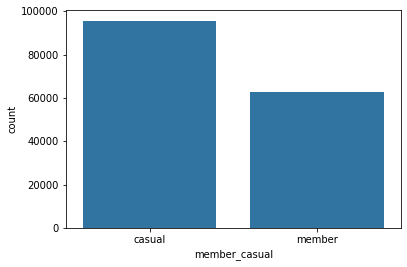

In [61]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_casual', color = base_color)


> as we saw above the casual element has more bike than member 

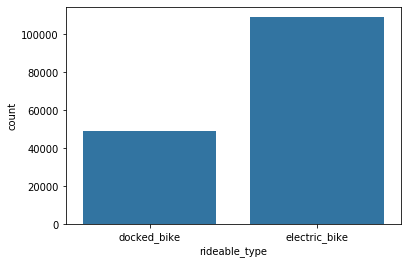

In [62]:
sb.countplot(data = df_new, x = 'rideable_type', color = base_color);


> plotting the difference between 2 types of rideable_type and we saw that 'electric_bike' has the most effeicient  than other

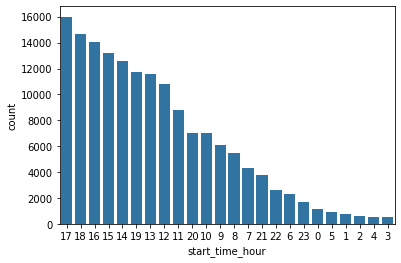

In [63]:
base_color = sb.color_palette()[0]
cat_order = df_new['start_time_hour'].value_counts().index
sb.countplot(data = df_new, x = 'start_time_hour', color = base_color, order = cat_order)


> as we saw at the plot above >> the most bike hour is 17 and the less one is 3 and 4

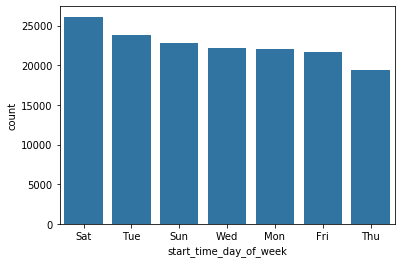

In [64]:
base_color = sb.color_palette()[0]
cat_order = df_new['start_time_day_of_week'].value_counts().index
sb.countplot(data = df_new, x = 'start_time_day_of_week', color = base_color , order = cat_order);


> Saterday has the most bike count comparing with daysleft
> and the day that has the less bike count as you see in the plot is thuresday

(-1.1076765234509274,
 1.1084820458101243,
 -1.1104029378417133,
 1.1057556314193384)

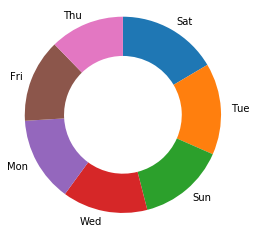

In [65]:
sorted_counts = df['start_time_day_of_week'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

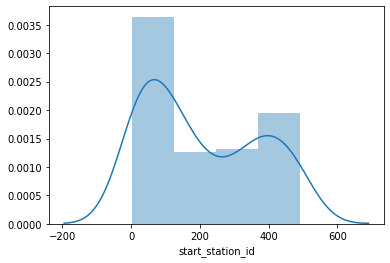

In [96]:
sb.distplot(df_new['start_station_id'])


# for each type of them we explaining which day has the most bike count and which one is less bike count per hour


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> for sure yes . the first edit i have done is make bike counting by seperated day by Extracting day of week, hours information from the started_at column


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

######  the started_at and ended_at columns classified as object so we have to convert them to date rime instead
######  Remove rows that does not have start_station_id value
######  Remove rows that does not have member_casual value

## Bivariate Exploration


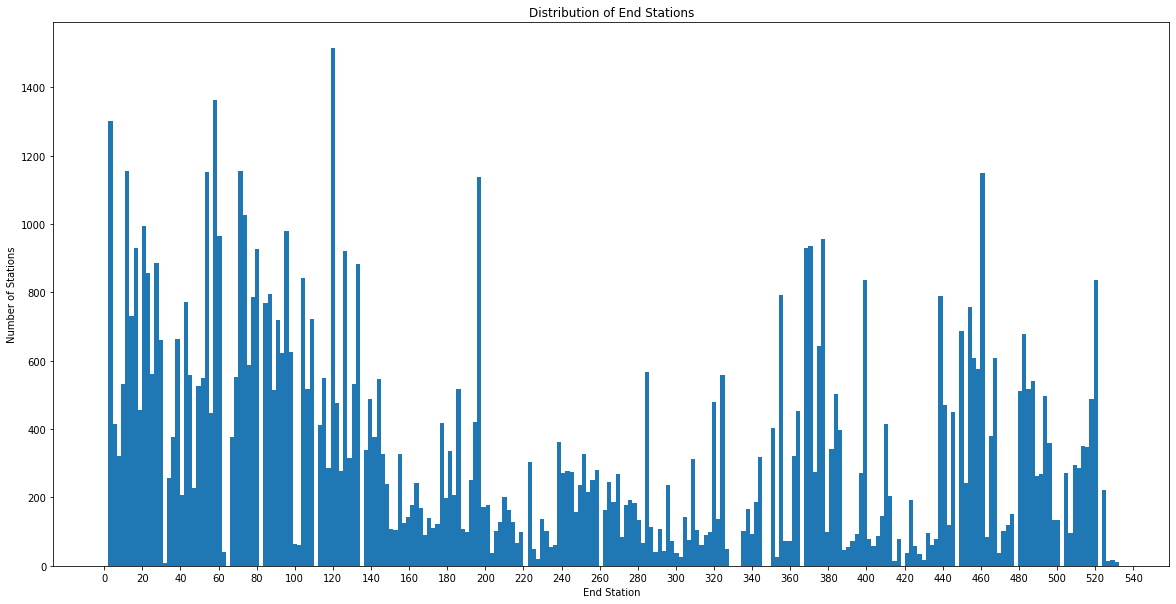

In [69]:
binsize =2.2
bins = np.arange(0, df_new['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 10])
plt.xticks(range(0, 550, 20))
plt.hist(data = df_new.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

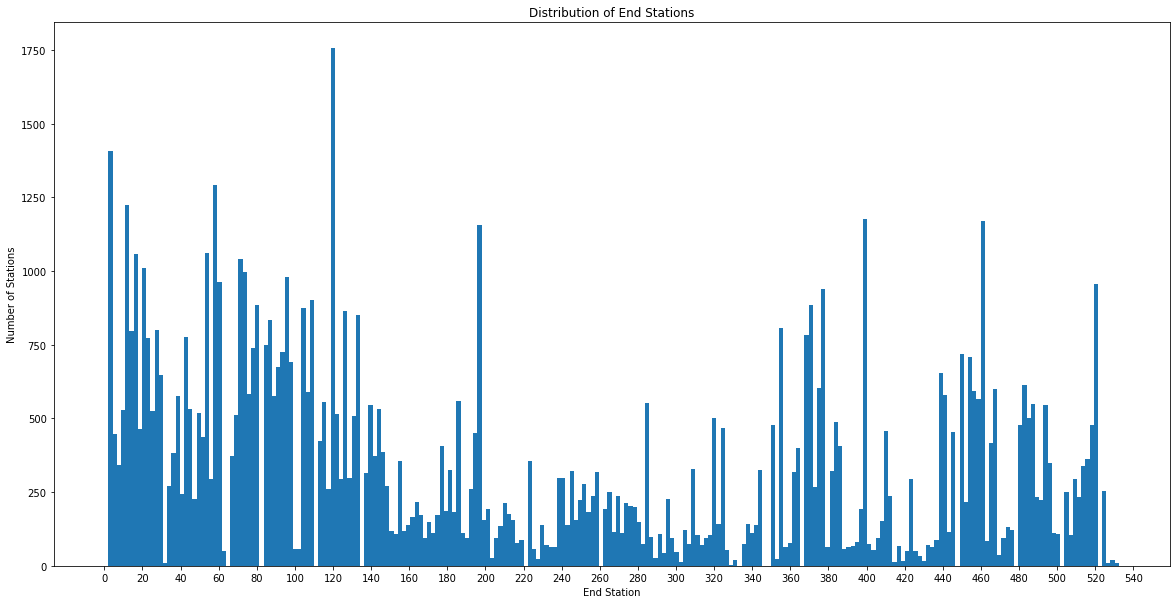

In [80]:
binsize =2.2
bins = np.arange(0, df_new['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 10])
plt.xticks(range(0, 550, 20))
plt.hist(data = df_new.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

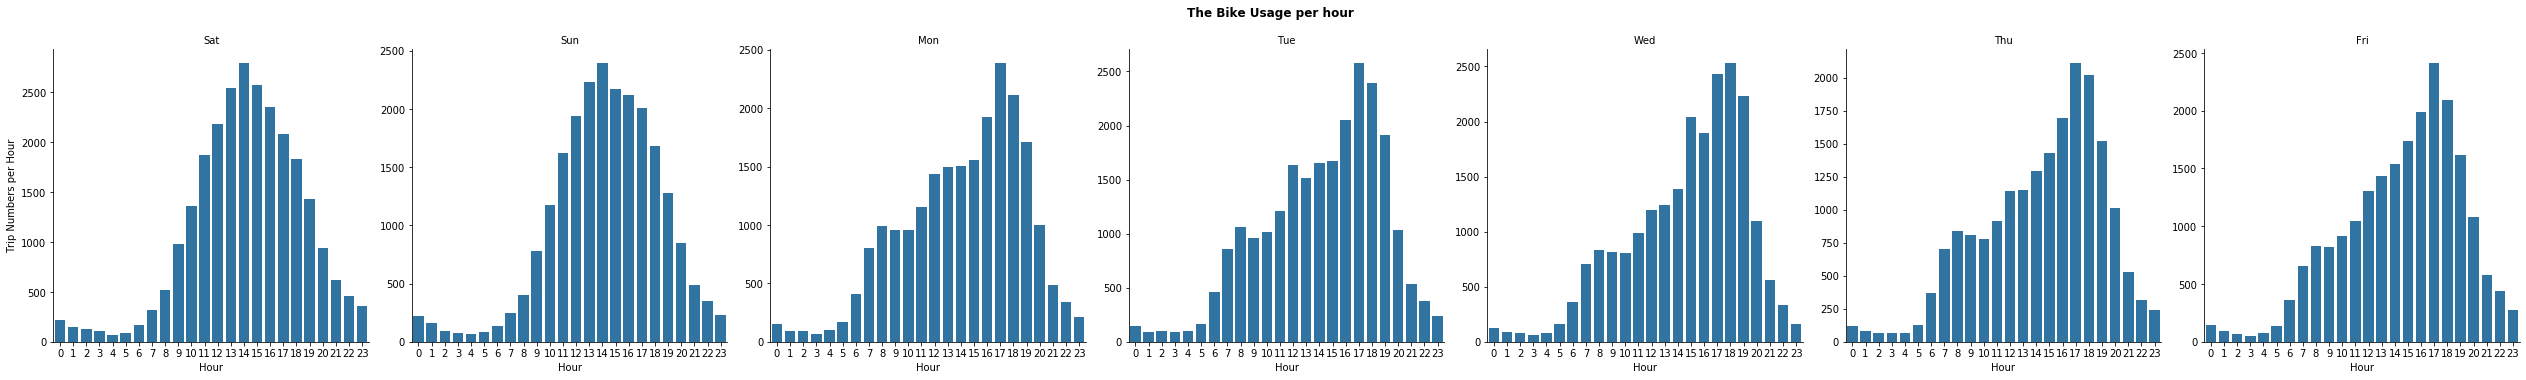

In [73]:
# for each type of them we explaining which day has the most bike count and which one is less bike count per hour
a = sb.catplot(data=df_new, x='start_time_hour', col="start_time_day_of_week", kind='count', sharey = False,
            color = base_color)
a.set_axis_labels("Hour", "Trip Numbers per Hour")
a.set_titles("{col_name}")
a.fig.suptitle('The Bike Usage per hour', y=1.05, fontsize=12, fontweight='semibold');

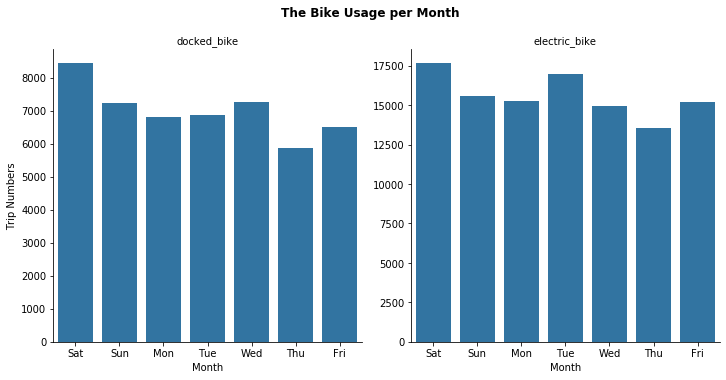

In [75]:
# plotting two types of rideable_type 
# for each type of them we explaining which day has the most bike count and which one is less bike count per month
a = sb.catplot(data=df_new, x='start_time_day_of_week', col="rideable_type", kind='count', sharey = False,
            color = base_color)
a.set_axis_labels("Month", "Trip Numbers")
a.set_titles("{col_name}")
a.fig.suptitle('The Bike Usage per Month', y=1.05, fontsize=12, fontweight='semibold');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> first we plotted the relationship between start_station_id and end_station_id and that plot explains the distripution between them in visualization

###### we also explains that for each type of them we explaining which day has the most bike count and which one is less bike count per hour
###### we also explains that for each type of them we explaining which day has the most bike count and which one is less bike count per month



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

##### the bike usage per month for electric_bike incresed to 17500 on saterday which unlike thuresdat that has the least bike count
###### in the docked_bike portion we saw that saterday has the most bike count and it's up to 8000 unlike thuresday alse the other one

## Multivariate Exploration

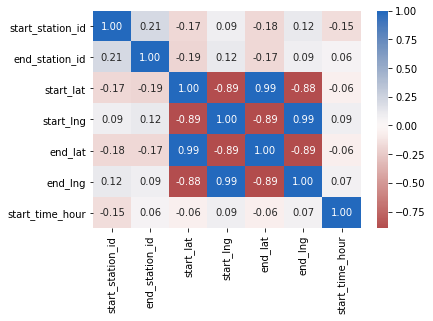

In [97]:
sb.heatmap(df_new.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)


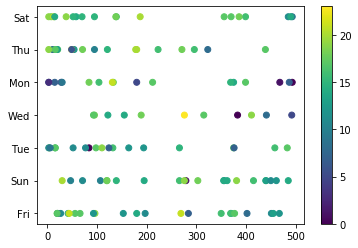

In [98]:
plt.scatter(data = df_new, x = 'start_station_id', y = 'start_time_day_of_week', c = 'start_time_hour')
plt.colorbar()

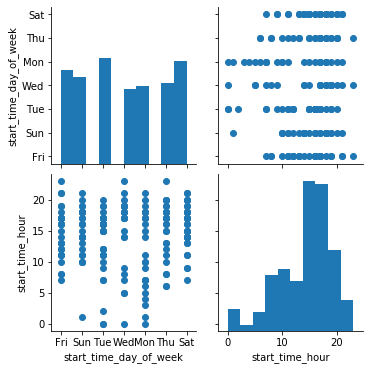

In [94]:
g = sb.PairGrid(data = df_new, vars = ['start_time_day_of_week', 'start_time_hour'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

##### first plot elaborating a general display for most common columns we use and the difference between each type of them by weekday and hour
##### second plot explains the start dtstion id columns options for each day of week and hour
##### third plot explains that the start time of the week per day and per hour

### Were there any interesting or surprising interactions between features?

###### saterday totally has the most effective day of all 

In [95]:
df_new.to_csv('df_new')